<a href="https://colab.research.google.com/github/Prachi09062003/Deep-Learning-Project/blob/main/Pneumonia_chest_xray_analysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Install Kaggle
!pip install Kaggle

#Upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prachimistry","key":"30bd710c91b309085f230203005e01fd"}'}

In [3]:
#create kaggle folder
!mkdir -p ~/.kaggle
#copy kaggle.json to kaggle folder
!cp kaggle.json ~/.kaggle/

In [4]:
#permission for json file to act
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#download the dataset from kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.28G/2.29G [00:18<00:00, 220MB/s]
100% 2.29G/2.29G [00:18<00:00, 130MB/s]


In [6]:
#unzip the dataset
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

Load and Preprocess the data

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#Define directories
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

#initailize imagedatagenerator for preprocessing
datagen = ImageDataGenerator(rescale=1./255)

#load and preprocess the data
train_data = datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size = 32, class_mode = 'binary')
val_data = datagen.flow_from_directory(val_dir, target_size=(224,224), batch_size=32, class_mode='binary')
test_data = datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Visualize the data

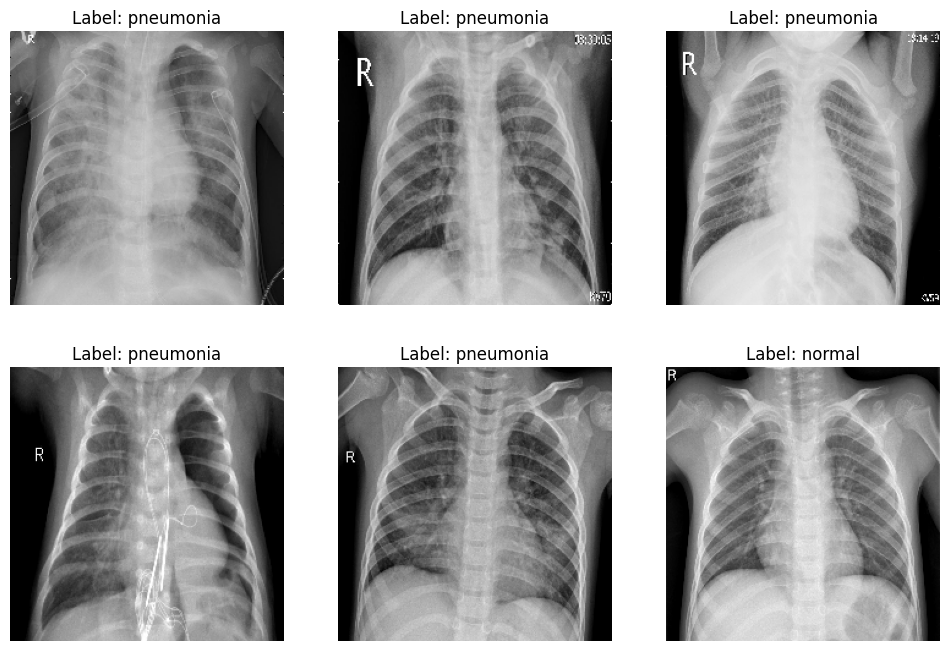

In [14]:
#function to plot the images
def plot_images(images, labels, num_images=6):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        label_text = 'normal' if labels[i] == 0 else 'pneumonia'
        plt.title(f"Label: {label_text}")
        plt.axis('off')
    plt.show()

# Load a batch of images and labels
images, labels = next(train_data)

# Plot the first 6 images
plot_images(images, labels, num_images=6)

Build the CNN model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

#initialize cnn model
model = Sequential()

#1st Convolutional layer with maxpooling
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))

#2nd Convolutional layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

#3rd Convolutional layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

#4th Convolutional layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

#5th Convolutional layer
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

#Flattening
model.add(Flatten())

#Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [17]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

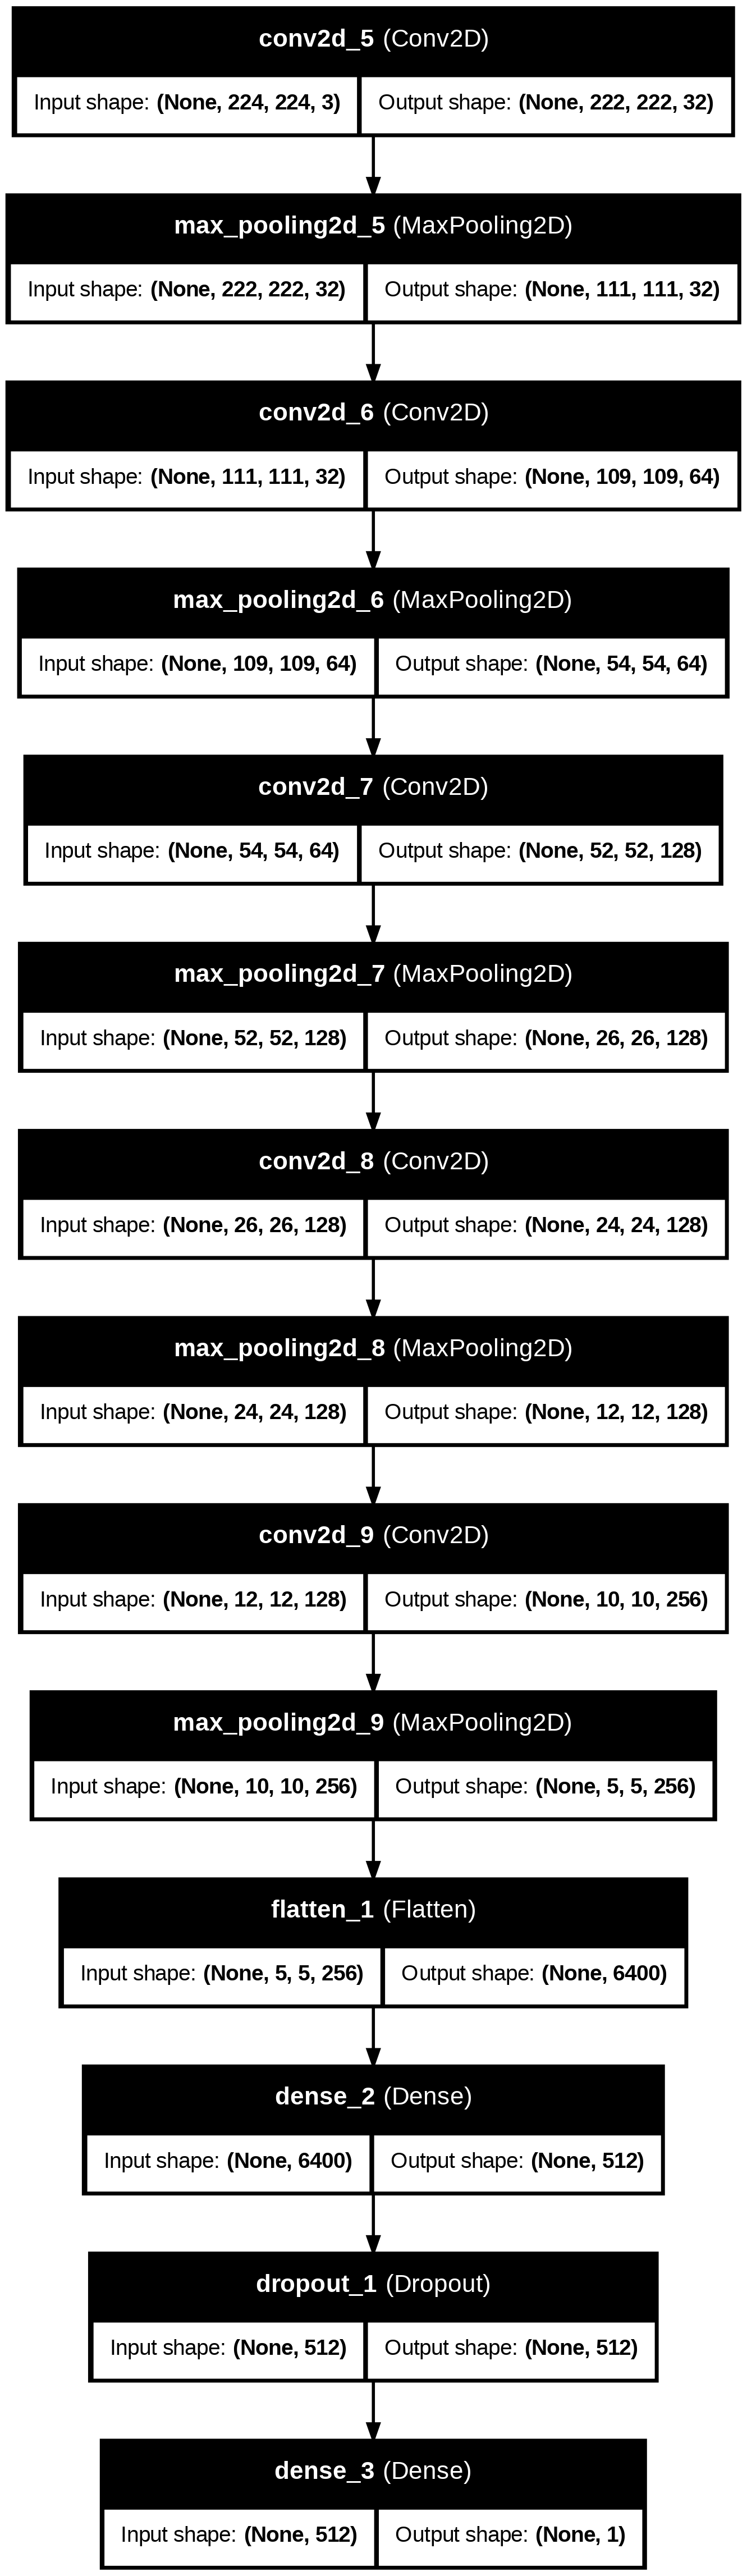

In [18]:
#Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [19]:
#Summarize the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,813,825 (14.55 MB)

 Trainable params: 3,813,825 (14.55 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [20]:
#train the model
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 751s 5s/step - accuracy: 0.7813 - loss: 0.5143 - val_accuracy: 0.8125 - val_loss: 0.3923
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 753s 5s/step - accuracy: 0.9468 - loss: 0.1392 - val_accuracy: 0.7500 - val_loss: 0.4354
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 748s 5s/step - accuracy: 0.9658 - loss: 0.0960 - val_accuracy: 0.9375 - val_loss: 0.1392
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 737s 5s/step - accuracy: 0.9720 - loss: 0.0764 - val_accuracy: 0.9375 - val_loss: 0.3210
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 747s 5s/step - accuracy: 0.9776 - loss: 0.0632 - val_accuracy: 0.8125 - val_loss: 0.5036
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 805s 5s/step - accuracy: 0.9786 - loss: 0.0521 - val_accuracy: 0.9375 - val_loss: 0.0884
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 729s 4s/step - accuracy: 0.9834 - loss: 0.0431 - val_accuracy: 0.6875 - val_loss: 0.8244
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 736s 4s/step - accuracy: 0.9822 - loss: 0.0477 - val_accuracy: 0.812

Evaluate the model

In [23]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7568 - loss: 1.7434
Test Accuracy: 0.74


Plot Training History

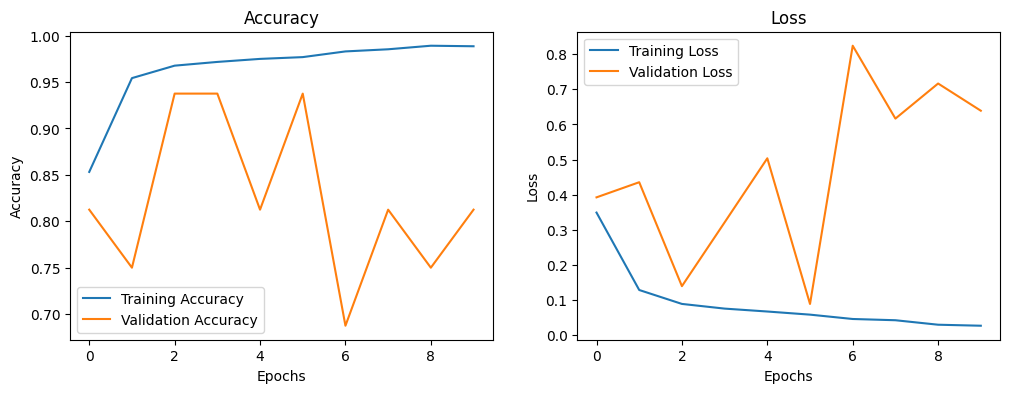

In [24]:
#plot training and validation accuracy and loss
plt.figure(figsize =(12,4))

#plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Confusion matrix

20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step


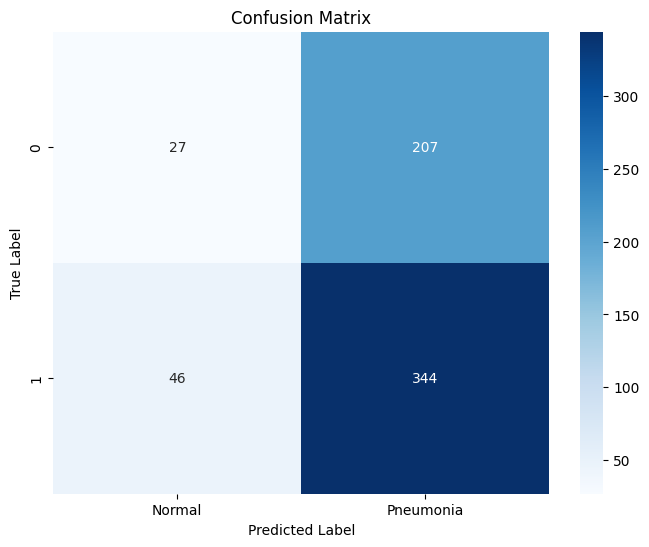

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#predict classes for test set
y_true = test_data.classes
y_pred = (model.predict(test_data) > 0.5).astype('int32').reshape(-1)

#generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

#plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal','Pneumonia'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()